In [1]:
import qiskit
import numpy as np
from matplotlib import pyplot as plt
import math

So far there I have studied Basis encoding and Amplitude encoding. Basic encoding is elimentry and hence mostly ignored.
## Amplitude Encoding

Given a normalized vector of $N \times M$ elements, where N is the number of features and M is the number of datapoints, we can encode it into the amplitude if a quantum state.
Define: $\alpha  = A_{norm}(x_1^1, x_2^1,...,x_n^1,x_1^2,.....,x_N^M)$ we can define the data encoding state as, 
$$
\ket{\mathcal{X}} = \sum_{i = 1}^{2^n} \alpha_i \ket{i}, \text{where $n$ is the number if qubits, } n \geq \log_2({N \times M})
$$

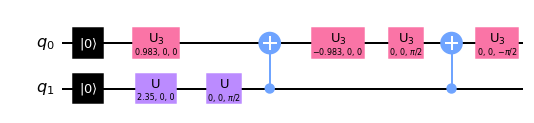

In [2]:
def get_circuit(X):
    A_norm = np.sqrt(np.sum([i * i for i in [j for j in X]]))

    #ANOTHER WAY
    X_reshape = X.repeat(1)
    A_norm2 = np.sqrt(np.sum(X_reshape ** 2 ))
    #---------------------------------------#

    alpha = X/A_norm
    alpha = list(alpha.repeat(1))
    power_2 = int(np.ceil(np.log2(len(X_reshape))))
    while len(alpha) < 2**power_2:
        alpha.append(0)
    n = int(np.ceil(np.log2(X.shape[0]*X.shape[1])))
    qc = qiskit.QuantumCircuit(n)
    qc.initialize(alpha,[i for i in range(n)])
    return qc.decompose().decompose().decompose().decompose().decompose().decompose().decompose().draw(output = "mpl")
    
X_1 = np.array([[1.5,0],[-2,3]])
X_2 = np.array([[1,1],[1,2],[3,2],[1,5],[2,2],[2,3]])
get_circuit(X_1)




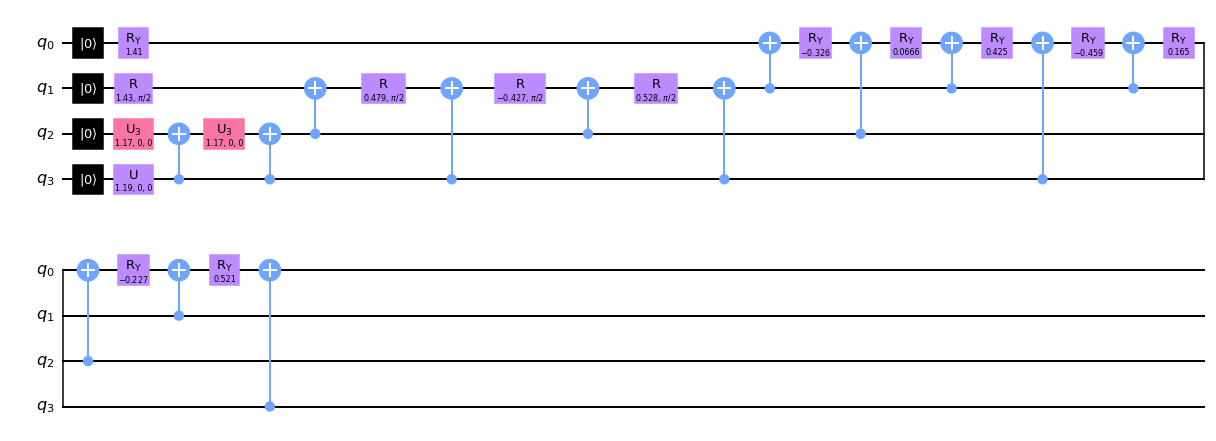

In [3]:
get_circuit(X_2)

## Angle Encoding

We can encode a vector $x = \{x_1,x_2,....,x_N\}$ in to quantum as an angle of a state defined as ,
$$\begin{equation}
S_{x_j} = \otimes_{i=1}^N U(x_j^i), U(x_j^i) = R_y(2 x_j^i)
\end{equation}
$$
Example: $x = (0,\frac{\pi}{4},\frac{\pi}{2})$.

$n \geq N$

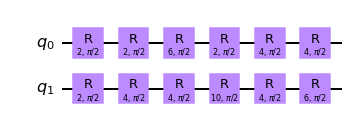

In [30]:
x = np.array([0,np.pi/4,np.pi/2])
n = X_2[0].shape[0]
qc = qiskit.QuantumCircuit(n)
for a in X_2:
    for qubit,angle in enumerate(a):
        qc.ry(2 * angle, qubit)
qc.decompose().draw(output="mpl")


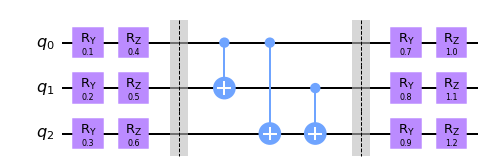

In [37]:
from qiskit.circuit.library import EfficientSU2

circuit = EfficientSU2(num_qubits=3, reps=1,insert_barriers=True)
circuit.decompose().draw(output = 'mpl')

#take an example
x = [i/10 for i in range(1,13)]
encoding = circuit.bind_parameters(x)
encoding.decompose().draw(output = 'mpl')